<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>
# <center>Density-Based Clustering</center>

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.



In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

Import the following libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Remember <b> %matplotlib inline </b> to display plots

In [207]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
# !conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

In [209]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Data generation
The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [212]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.

In [215]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
__Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
__minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.



In [218]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 0, 2, 1], dtype=int64)

### Distinguish outliers
Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [221]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True, False,  True])

In [223]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [225]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization

In [228]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

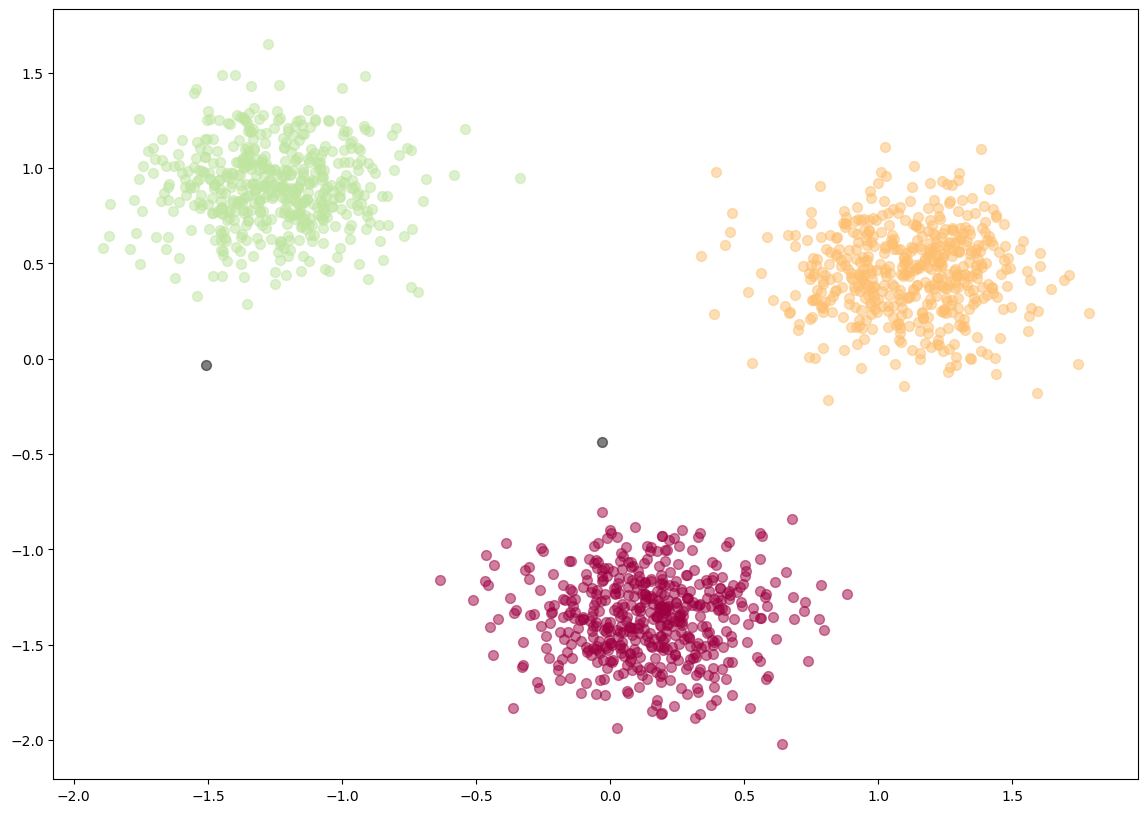

In [230]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, color=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, color=col, marker=u'o', alpha=0.5)




<h1 align=center> Stroke Prediction Clustering using DBSCAN & scikit-learn </h1>
<hr>

DBSCAN is specially very good for tasks like class identification on a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. For example, this following example we will use the stroke prediction dataset.
<Click 1>
DBSCAN can be used here, for instance, to find the group of individuals with similar health conditions or risk factors related to strokes. As you can see, it not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises.

let's start playing with the data. We will be working according to the following workflow: </font>
1. Loading data
- Overview data
- Data cleaning
- Data selection
- Clusteing

### About the dataset

		
<h4 align = "center">
Dados do Dataset
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>id</td>
    <td>Identificador Único do paciente</td>
  </tr>
  <tr>
    <td>gender</td>
    <td>Sexo do paciente (Masculino, Feminino, Outro)</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Idade do Paciente em anos</td>
  </tr>
  <tr>
    <td>hypertension</td>
    <td>Indica se o paciente tem hipertensão (0 = Não, 1 = Sim)</td>
  </tr>
  <tr>
    <td>heart_diseace</td>
    <td>Indica se o paciente tem doença cardíaca (0 = Não, 1 = Sim)</td>
  </tr>
  <tr>
    <td>ever_married</td>
    <td>Indica se o paciente já foi casado (Sim ou Não)</td>
  </tr>
  <tr>
    <td>work_type</td>
    <td>Tipo de ocupação do paciente (Privado, Autónomo, Criança, Governo, Nunca trabalhou)</td>
  </tr>
  <tr>
    <td>Residence_type</td>
    <td>Tipo de residência do paciente (Rural ou Urbana)</td>
  </tr>
  <tr>
    <td>avg_glucose_level</td>
    <td>Nível médio de glicose no sangue do paciente</td>
  </tr>
  <tr>
    <td>bmi</td>
    <td>Índice de Massa Corpolar (IMC) do paciente</td>
  </tr>
  <tr>
    <td>smoking_status</td>
    <td>Status de tabagismo do paciente (Nunca fumou, Fumador, Foi Fumador, Desconhecido)</td>
  </tr>
  <tr>
    <td>stroke</td>
    <td>Variável-alvo. Indica se o paciente sofreu um derrame (0 = Não, 1 = Sim)</td>
  </tr>


</table>

</body>
</html>

 

### 1-Download data
Para fazer o download do dataset aconselha-se a ir à própria página e realizar o download manualmente, visto que para utilizar o wget seria necessário realizar vários passos no Kaggle, tais como, gerar tokens etc.

### 2- Load the dataset
We will import the .csv.

In [ ]:
import csv
import pandas as pd
import numpy as np

filename="./healthcare-dataset-stroke-data.csv"

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 3-Cleaning
Lets remove rows that dont have any value in the __bmi__ field.

In [9]:
pdf = pdf[pd.notnull(pdf["bmi"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### 4-Visualization

Scatter plot showing the relationship between age and average glucose level, where:
- **Point size** represents BMI (Body Mass Index).
- **Point color** indicates the presence or absence of stroke (0 or 1) using the 'viridis' colormap.

This visualization highlights potential correlations between age, glucose levels, and stroke occurr

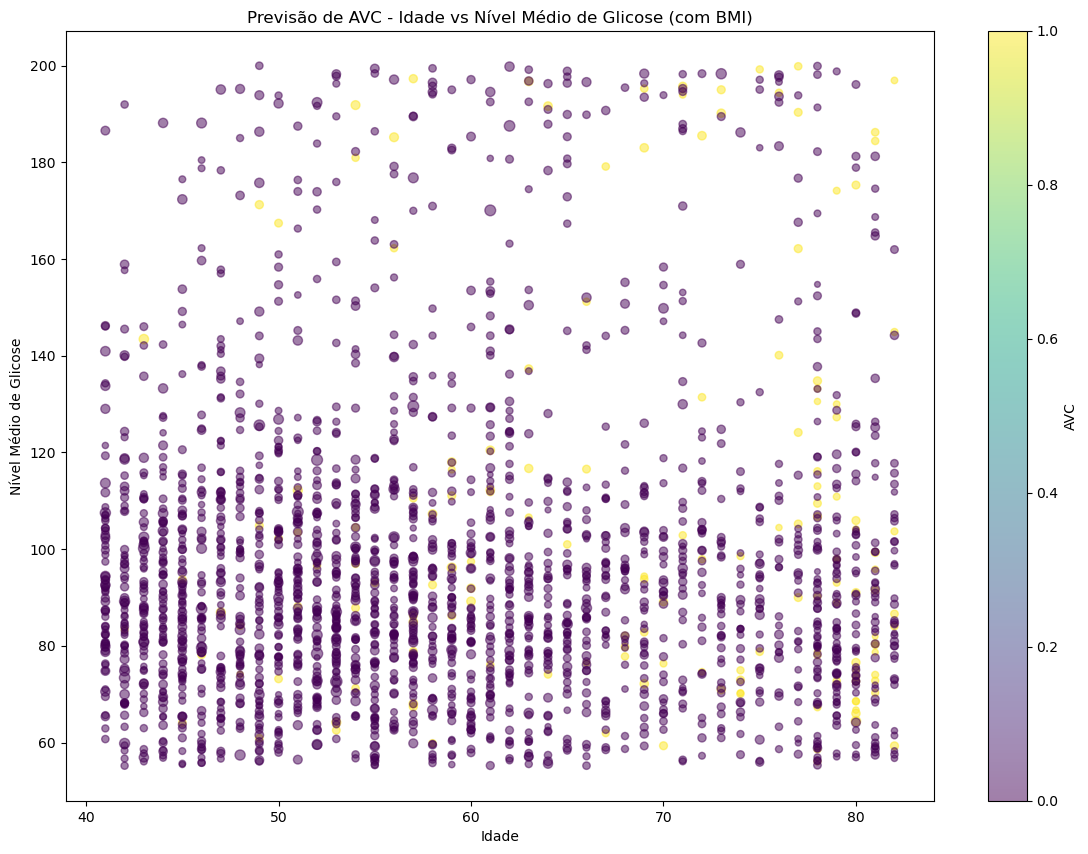

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = (14, 10)

pdf = pdf[(pdf['age'] > 40) & (pdf['avg_glucose_level'] < 200)] 

plt.figure(figsize=(14, 10))
scatter = plt.scatter(pdf['age'], pdf['avg_glucose_level'], s=pdf['bmi'], alpha=0.5, c=pdf['stroke'], cmap='viridis')
plt.xlabel('Idade')
plt.ylabel('Nível Médio de Glicose')
plt.title('Previsão de AVC - Idade vs Nível Médio de Glicose (com BMI)')
plt.colorbar(scatter, label='AVC')
plt.show()

### 5- Clustering of Patients Based on Their Characteristics

__DBSCAN__ form sklearn library can runs DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 

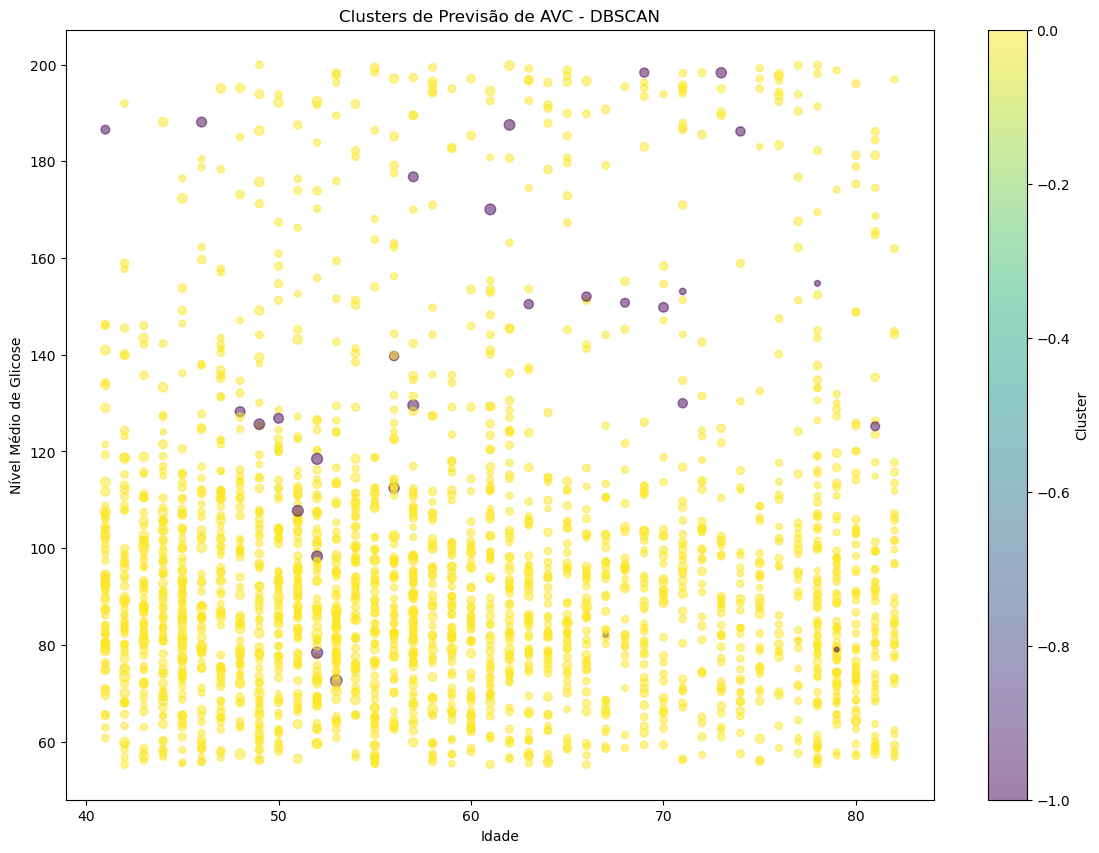

In [158]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Clus_dataSet = pdf[['age', 'avg_glucose_level', 'bmi']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=0.7, min_samples=7).fit(Clus_dataSet)  
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

pdf["Clus_Db"] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

plt.figure(figsize=(14, 10))
scatter = plt.scatter(pdf['age'], pdf['avg_glucose_level'], s=pdf['bmi'], alpha=0.5, c=pdf['Clus_Db'], cmap='viridis')
plt.xlabel('Idade')
plt.ylabel('Nível Médio de Glicose')
plt.title('Clusters de Previsão de AVC - DBSCAN')
plt.colorbar(scatter, label='Cluster')
plt.show()

As you can see for outliers, the cluster label is -1

In [155]:
set(labels)

{-1}

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​